# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from keras import Sequential
from keras.layers import Dense, Softmax
from keras.utils import to_categorical

%matplotlib inline

Using TensorFlow backend.
/Users/arw/anaconda3/envs/text-analytics/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/arw/anaconda3/envs/text-analytics/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/arw/anaconda3/envs/text-analytics/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

# Plotting setup

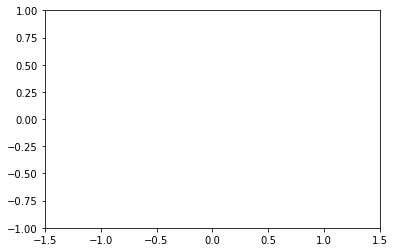

In [2]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots();

ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1,1])
line1, = ax.plot([], [], '-')
line2 = ax.scatter([], [])

In [3]:
# Helper function to visualize decision boundaries
def visualize(model, data, labels, w, b, title=None, colors=['r','b','g'], background_colors=['#FF6969', '#6B94DC', '#6DDC6B']):
    nx,ny = 500,500
    xx,yy = np.meshgrid(np.linspace(-1.5, 1.5, nx), np.linspace(-1, 1, ny))
    x_grid = np.hstack((xx.flatten().reshape(nx*ny,1), yy.flatten().reshape(nx*ny,1)))

    y_pred = model.predict(x_grid, verbose=False)
    g = np.argmax(y_pred, axis=1)
    c = [background_colors[v] for v in g]
    plt.scatter(xx, yy, c=c, s=40, marker='s', edgecolor='none')#, cmap=plt.cm.Spectral)
    plt.scatter([x[0] for x in data], [x[1] for x in data], c=[colors[l] for l in labels], s=40)
    plt.xlim([-1.5,1.5])
    plt.ylim([-1,1])
    if title:
        plt.title(title)
    plt.show()

# Data Generation
This time, we will generate some difficult toy data - you'll see soon what makes it difficult!

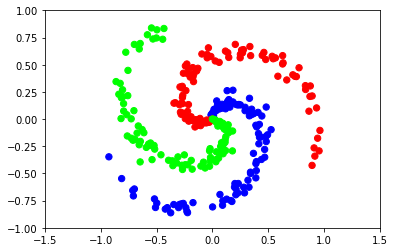

In [4]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

plt.xlim([-1.5,1.5])
plt.ylim([-1,1])

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.get_cmap('brg'))
plt.show()

Just like last time, we have to convert `y` into a matrix of probabilities

In [5]:

y_probs = to_categorical(y) # = .... Write code here to convert label vector y into the required format

# Learning a model

In [8]:
model = Sequential() # .... Define a model just like we did in binary cross entropy
# Remember that in this case, we are going to be doing a 3-way classification!
model.add(Dense(3, input_shape=(2,)))
model.add(Softmax())

sgd_optimizer = optimizers.SGD(lr=0.01)
model.compile(loss="categorical_crossentropy",
              optimizer=sgd_optimizer,
              metrics=['acc'])
model.summary()

NameError: name 'optimizers' is not defined

In [ ]:
model.fit(X, y_probs, epochs=10)

# Visualization

In [ ]:
w, b = model.layers[0].get_weights()
visualize(model, X, y, w, b)